## 1. Data reading & splitting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

# reading iteration6 data from LMS
# removed 4 columns
url = "https://drive.google.com/file/d/1eXX9YC4mcoZlVBumMjvnEnwB7M1PklbA/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)


# reading competition data
url = "https://drive.google.com/file/d/1wGm7JnryxXFNBANRuBtkfWVT2atOa4PM/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
test_data = pd.read_csv(path)

# X and y creation
X = data.copy()
y = X.pop("Expensive")

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

**`Automate process`**

In [ ]:
# select categorical and numerical column names
X_cat_columns = X.select_dtypes(exclude="number").copy().columns
X_num_columns = X.select_dtypes(include="number").copy().columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Others"),
    OneHotEncoder(handle_unknown = "ignore")
)

In [ ]:
# To check categorical values
#for i in X_cat_columns:
 #   print(i, " : ", data[i].unique())

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num_columns),
        ("cat_pipe", categoric_pipe, X_cat_columns),
    ]
)

In [ ]:
full_pipeline_dt = make_pipeline(preprocessor, 
                              DecisionTreeClassifier(random_state =10,max_depth=2,min_samples_leaf=2))

In [ ]:
full_pipeline_dt.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces', 'PoolArea', 'GarageCars',
       'WoodDeckSF', 'ScreenPorch', 'MSSubClass', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF...
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtFinType2', 'HeatingQC', 'Electrical', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object'))])),
                ('decisiontreeclassifier',
                 De

In [ ]:
#full_pipeline_dt.get_params()

In [ ]:
# Predcition on test(competition) data
acc_dt = round(accuracy_score(y, full_pipeline_dt.predict(test_data))*100,2)
acc_dt

75.46

In [ ]:
import csv
import requests
result_dt = full_pipeline_dt.predict(test_data)
result_dt

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from google.colab import files
df = pd.DataFrame().assign(Id=test_data['Id'], Expensive=result_dt)
df.to_csv('result_dt.csv', index = False)
files.download("result_dt.csv")

In [ ]:
#RandomForest
full_pipeline_rf = make_pipeline(preprocessor,
                              RandomForestClassifier(max_depth=6,min_samples_leaf=2,n_estimators=150,random_state=10))
full_pipeline_rf.fit(X_train, y_train)
full_pipeline_rf.predict(X_train)
acc_random_forest = round(accuracy_score(y, full_pipeline_rf.predict(test_data))*100,2)
acc_random_forest

77.24

In [ ]:
import csv
import requests
result_rf = full_pipeline_rf.predict(test_data)
result_rf

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from google.colab import files
df = pd.DataFrame().assign(Id=test_data['Id'], Expensive=result_rf)
df.to_csv('result_rf.csv', index = False)
files.download("result_rf.csv")

In [ ]:
# KNN 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
full_pipeline_knn = make_pipeline(preprocessor, 
                              KNeighborsClassifier(n_neighbors=8, weights ="uniform",leaf_size=2, metric="manhattan"))
full_pipeline_knn.fit(X_train, y_train)
full_pipeline_knn.predict(X_train)
acc_knn = round(accuracy_score(y, full_pipeline_knn.predict(test_data))*100,2)
acc_knn

77.52

In [ ]:
import csv
import requests
result_knn = full_pipeline_knn.predict(test_data)
len(result_knn)

1459

In [ ]:
from google.colab import files
df = pd.DataFrame().assign(Id=test_data['Id'], Expensive=result_knn)
df.to_csv('result_knn.csv', index = False)
files.download("result_knn.csv")

In [ ]:
#Which is the best Model ?
results = pd.DataFrame({
    'Model': ['KNN','Random Forest','Decision Tree'],
    'Score': [acc_knn, acc_random_forest, acc_dt]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
77.52,KNN
77.24,Random Forest
75.46,Decision Tree


### **Exercise 1:** use the new Pipeline with branches to train a DecisionTree with GridSearch cross validation.

We are basically asking to combine what you have learned in this notebook (categorical encoding & branches) with what you learned in the previous one (using `GridSearchCV` for a whole Pipeline).

In [ ]:
from sklearn.model_selection import GridSearchCV

param_range = [2, 4, 6, 8, 10]
estimators_range = [50,100,150]
num_range = ["mean", "median","std"]

dt_param_grid = [{
    "columntransformer__num_pipe__simpleimputer__strategy": num_range,
    "decisiontreeclassifier__max_depth": param_range,
    "decisiontreeclassifier__min_samples_leaf": param_range
}]
rf_param_grid = [{ "columntransformer__num_pipe__simpleimputer__strategy": num_range,
                   "randomforestclassifier__n_estimators" :estimators_range,
                   "randomforestclassifier__max_depth": param_range,
                   "randomforestclassifier__min_samples_leaf": param_range
}]
knn_param_grid = [{'kneighborsclassifier__n_neighbors': param_range,
                   'kneighborsclassifier__weights': ['uniform', 'distance'],
                   'kneighborsclassifier__metric': ['euclidean', 'manhattan']
                   #'kneighborsclassifier__standardscaler':[StandardScaler(), MinMaxScaler(), RobustScaler()]
}]

dt_search = GridSearchCV(estimator=full_pipeline_dt,
                      param_grid=dt_param_grid,
                      scoring='accuracy',
                      cv=5,
                      verbose=1)
rf_search = GridSearchCV(estimator=full_pipeline_rf,
                      param_grid=rf_param_grid,
                      scoring='accuracy',
                      cv=5,
                      verbose=1)
knn_search = GridSearchCV(estimator=full_pipeline_knn,
                      param_grid=knn_param_grid,
                      scoring='accuracy',
                      cv=5,
                      verbose=1)
grids = [dt_search,rf_search,knn_search]
for pipe in grids:
    pipe.fit(X_test,y_test)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
125 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-packa

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
375 fits failed out of a total of 1125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
375 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-pack

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
grid_dict = {0: 'Decision Trees', 
             1: 'Random Forest',
             2: 'KNN'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i],model.best_params_))

Decision Trees Test Accuracy: 0.9486301369863014
Decision Trees Best Params: {'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'decisiontreeclassifier__max_depth': 2, 'decisiontreeclassifier__min_samples_leaf': 2}
Random Forest Test Accuracy: 0.976027397260274
Random Forest Best Params: {'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'randomforestclassifier__max_depth': 6, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__n_estimators': 150}
KNN Test Accuracy: 0.9178082191780822
KNN Best Params: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 8, 'kneighborsclassifier__weights': 'uniform'}


In [ ]:
from sklearn.metrics import confusion_matrix

rf_pred = rf_search.predict(test_data)
confusion_matrix(rf_pred, y)

array([[1090,  189],
       [ 152,   28]])

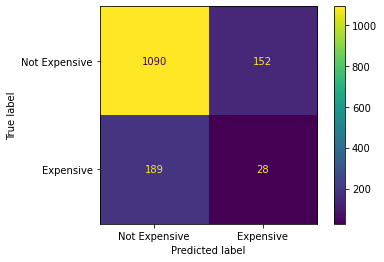

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf_search, 
                                      test_data, 
                                      y, 
                                      display_labels=['Not Expensive', 'Expensive']);

In [ ]:
dt_pred = dt_search.predict(test_data)
confusion_matrix(dt_pred, y)

array([[1034,  185],
       [ 208,   32]])

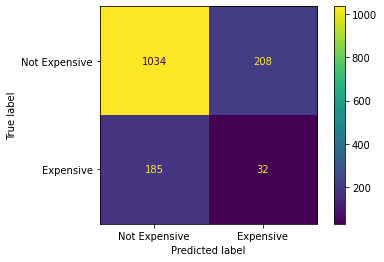

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dt_search, 
                                      test_data, 
                                      y, 
                                      display_labels=['Not Expensive', 'Expensive']);

In [ ]:
knn_pred = knn_search.predict(test_data)
confusion_matrix(knn_pred, y)

array([[1123,  196],
       [ 119,   21]])

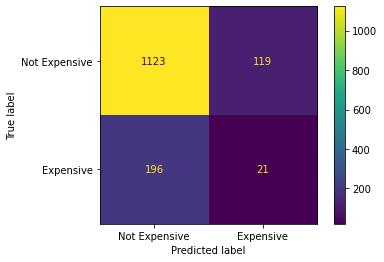

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn_search, 
                                      test_data, 
                                      y, 
                                      display_labels=['Not Expensive', 'Expensive']);

In [ ]:
from sklearn.metrics import f1_score
f1_score(y, dt_pred)

0.1400437636761488